In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt') 
nltk.download('words')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /home/vscode/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/vscode/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from nltk.corpus import stopwords, words
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

# Load dataset, Set type, and rename col
data_path = 'data/twitter.csv'
df = pd.read_csv(data_path, dtype={
    "content": "string",
    "sentiment": "string"
})

print("----------------------------------------------------------------------")
print("Raw Data", df.shape)



print("----------------------------------------------------------------------")

df = df[df['sentiment'] != 'Irrelevant']
print("After drop irrelevant")
display(df)


print("----------------------------------------------------------------------")

df = df.dropna(axis=0)


print("After drop na")
display(df)

df = df.drop_duplicates(subset='id', keep='first')

print("----------------------------------------------------------------------")
print("After drop duplicates")
display(df)

df = df[['content', 'sentiment']]

display(df)

# Data preprocessing
def no_prep(text):
    return text
def to_lower(text):
    return text.lower()
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

word_list = set(words.words())

def filter_real_words(text):
    words_in_text = word_tokenize(text)
    
    real_words = [word for word in words_in_text if word in word_list]
    
    return ' '.join(real_words)

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

stemmer = PorterStemmer()

def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

df['content'] = df['content'].apply(to_lower)
df['content'] = df['content'].apply(clean_text)
# df['content'] = df['content'].apply(filter_real_words)
df['content'] = df['content'].apply(stem_text)
df['content'] = df['content'].apply(remove_stopwords)
preprocessing_step = [no_prep, to_lower, clean_text, stem_text, remove_stopwords]


print("----------------------------------------------------------------------")
print("After data preprocessing")
print("Ready to go")
display(df)

print("----------------------------------------------------------------------")

# Vectorize text data
vectorizer = CountVectorizer(lowercase=False)
X = vectorizer.fit_transform(df['content'])

print("----------------------------------------------------------------------")
print("Number of Volcab:", len(vectorizer.get_feature_names_out()))
print("Vocabulary:", vectorizer.get_feature_names_out())
print("Bag-of-Words Matrix:\n", X.toarray())
print("Bag-of-Words Size:\n", X.toarray().shape)
print("----------------------------------------------------------------------")
# Map sentiment to numerical values
sentiment_mapping = {'Positive': 1, 'Negative': 0, 'Neutral': 2}
y = df['sentiment'].map(sentiment_mapping)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# model training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=sentiment_mapping.keys()))

----------------------------------------------------------------------
Raw Data (74682, 4)
----------------------------------------------------------------------
After drop irrelevant


,id,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


----------------------------------------------------------------------
After drop na


,id,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


----------------------------------------------------------------------
After drop duplicates


,id,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
12,2403,Borderlands,Neutral,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM..."
18,2404,Borderlands,Positive,that was the first borderlands session in a lo...
24,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
...,...,...,...,...
74652,9196,Nvidia,Negative,Cheap doesn't mean better btw! . . techsall.co...
74658,9197,Nvidia,Neutral,Nvidia doesn’t want to give up its 2017 ‘crypt...
74664,9198,Nvidia,Negative,Nvidia really delayed the 3070 2 weeks .
74670,9199,Nvidia,Positive,Let no elim go unnoticed. . . . NVIDIA Highlig...


,content,sentiment
0,im getting on borderlands and i will murder yo...,Positive
6,So I spent a few hours making something for fu...,Positive
12,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",Neutral
18,that was the first borderlands session in a lo...,Positive
24,the biggest dissappoinment in my life came out...,Negative
...,...,...
74652,Cheap doesn't mean better btw! . . techsall.co...,Negative
74658,Nvidia doesn’t want to give up its 2017 ‘crypt...,Neutral
74664,Nvidia really delayed the 3070 2 weeks .,Negative
74670,Let no elim go unnoticed. . . . NVIDIA Highlig...,Positive


----------------------------------------------------------------------
After data preprocessing
Ready to go


,content,sentiment
0,im get borderland murder,Positive
6,spent hour make someth fun dont know huge bord...,Positive
12,rockhard la varlop rare power handsom jackpot ...,Neutral
18,wa first borderland session long time actual r...,Positive
24,biggest dissappoin life came year ago fuck bor...,Negative
...,...,...
74652,cheap doesnt mean better btw techsallcomgoogle...,Negative
74658,nvidia doesnt want give 2017 crypto craze doc ...,Neutral
74664,nvidia realli delay 3070 2 week,Negative
74670,let elim go unnot nvidia highlight automat rec...,Positive


----------------------------------------------------------------------
----------------------------------------------------------------------
Number of Volcab: 16041
Vocabulary: ['00015cant' '00016' '001' ... 'घरच' 'ดการออกอากาศของฉนจาก' 'ℐℓ٥']
Bag-of-Words Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Bag-of-Words Size:
 (10282, 16041)
----------------------------------------------------------------------
              precision    recall  f1-score   support

    Positive       0.52      0.60      0.56       749
    Negative       0.52      0.55      0.53       700
     Neutral       0.44      0.32      0.37       608

    accuracy                           0.50      2057
   macro avg       0.49      0.49      0.49      2057
weighted avg       0.50      0.50      0.49      2057



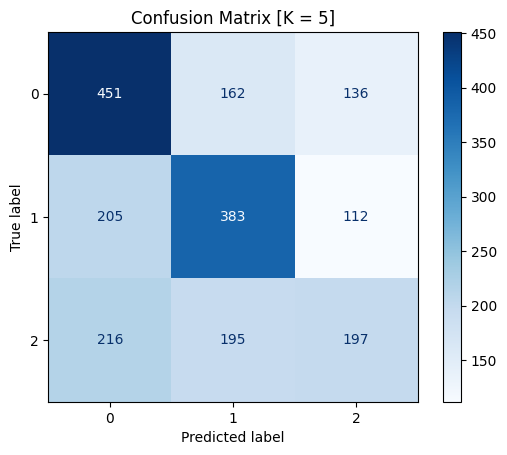

---------------------------------------
0


,content,sentiment
0,im getting on borderlands and i will murder yo...,Positive
6,So I spent a few hours making something for fu...,Positive
12,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",Neutral
18,that was the first borderlands session in a lo...,Positive
24,the biggest dissappoinment in my life came out...,Negative
...,...,...
74652,Cheap doesn't mean better btw! . . techsall.co...,Negative
74658,Nvidia doesn’t want to give up its 2017 ‘crypt...,Neutral
74664,Nvidia really delayed the 3070 2 weeks .,Negative
74670,Let no elim go unnoticed. . . . NVIDIA Highlig...,Positive


Number of Volcab: 24390
Vocabulary: ['00' '000' '00011' ... 'การออกอากาศของฉ' 'นจาก' 'ℐℓ٥']
Bag-of-Words Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Bag-of-Words Size:
 (10282, 24390)
---------------------------------------
---------------------------------------
1


,content,sentiment
0,im getting on borderlands and i will murder yo...,Positive
6,so i spent a few hours making something for fu...,Positive
12,"rock-hard la varlope, rare & powerful, handsom...",Neutral
18,that was the first borderlands session in a lo...,Positive
24,the biggest dissappoinment in my life came out...,Negative
...,...,...
74652,cheap doesn't mean better btw! . . techsall.co...,Negative
74658,nvidia doesn’t want to give up its 2017 ‘crypt...,Neutral
74664,nvidia really delayed the 3070 2 weeks .,Negative
74670,let no elim go unnoticed. . . . nvidia highlig...,Positive


Number of Volcab: 19349
Vocabulary: ['00' '000' '00011' ... 'การออกอากาศของฉ' 'นจาก' 'ℐℓ٥']
Bag-of-Words Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Bag-of-Words Size:
 (10282, 19349)
---------------------------------------
---------------------------------------
2


,content,sentiment
0,im getting on borderlands and i will murder yo...,Positive
6,so i spent a few hours making something for fu...,Positive
12,rockhard la varlope rare powerful handsome ja...,Neutral
18,that was the first borderlands session in a lo...,Positive
24,the biggest dissappoinment in my life came out...,Negative
...,...,...
74652,cheap doesnt mean better btw techsallcomgoog...,Negative
74658,nvidia doesnt want to give up its 2017 crypto ...,Neutral
74664,nvidia really delayed the 3070 2 weeks,Negative
74670,let no elim go unnoticed nvidia highlights ...,Positive


Number of Volcab: 19969
Vocabulary: ['00015cant' '00016' '001' ... 'घरच' 'ดการออกอากาศของฉนจาก' 'ℐℓ٥']
Bag-of-Words Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Bag-of-Words Size:
 (10282, 19969)
---------------------------------------
---------------------------------------
3


,content,sentiment
0,im get on borderland and i will murder you all,Positive
6,so i spent a few hour make someth for fun if y...,Positive
12,rockhard la varlop rare power handsom jackpot ...,Neutral
18,that wa the first borderland session in a long...,Positive
24,the biggest dissappoin in my life came out a y...,Negative
...,...,...
74652,cheap doesnt mean better btw techsallcomgoogle...,Negative
74658,nvidia doesnt want to give up it 2017 crypto c...,Neutral
74664,nvidia realli delay the 3070 2 week,Negative
74670,let no elim go unnot nvidia highlight automat ...,Positive


Number of Volcab: 16143
Vocabulary: ['00015cant' '00016' '001' ... 'घरच' 'ดการออกอากาศของฉนจาก' 'ℐℓ٥']
Bag-of-Words Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Bag-of-Words Size:
 (10282, 16143)
---------------------------------------
---------------------------------------
4


,content,sentiment
0,im get borderland murder,Positive
6,spent hour make someth fun dont know huge bord...,Positive
12,rockhard la varlop rare power handsom jackpot ...,Neutral
18,wa first borderland session long time actual r...,Positive
24,biggest dissappoin life came year ago fuck bor...,Negative
...,...,...
74652,cheap doesnt mean better btw techsallcomgoogle...,Negative
74658,nvidia doesnt want give 2017 crypto craze doc ...,Neutral
74664,nvidia realli delay 3070 2 week,Negative
74670,let elim go unnot nvidia highlight automat rec...,Positive


Number of Volcab: 16041
Vocabulary: ['00015cant' '00016' '001' ... 'घरच' 'ดการออกอากาศของฉนจาก' 'ℐℓ٥']
Bag-of-Words Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Bag-of-Words Size:
 (10282, 16041)
---------------------------------------


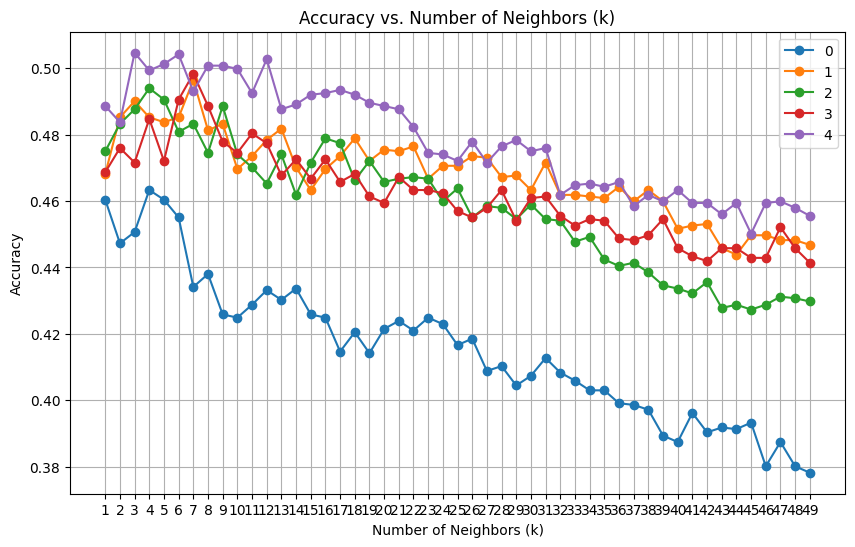

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix [K = 5]")
plt.show()

# Evaluate accuracy for different values of k
k_values = range(1, 50)
accuracies = []

# Load dataset, Set type, and rename col
data_path = 'data/twitter.csv'
df = pd.read_csv(data_path, dtype={
    "content": "string",
    "sentiment": "string"
})
df = df[df['sentiment'] != 'Irrelevant']
df = df.dropna(axis=0)
df = df.drop_duplicates(subset='id', keep='first')
df = df[['content', 'sentiment']]

for s in range(len(preprocessing_step)):
    df['content'] = df['content'].apply(preprocessing_step[s])



    vectorizer = CountVectorizer(lowercase=False)
    X = vectorizer.fit_transform(df['content'])

    sentiment_mapping = {'Positive': 1, 'Negative': 0, 'Neutral': 2}
    y = df['sentiment'].map(sentiment_mapping)

    print('---------------------------------------')
    print(f'{s}')
    display(df)

    print("Number of Volcab:", len(vectorizer.get_feature_names_out()))
    print("Vocabulary:", vectorizer.get_feature_names_out())
    print("Bag-of-Words Matrix:\n", X.toarray())
    print("Bag-of-Words Size:\n", X.toarray().shape)
    print('---------------------------------------')

    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

    tmp=[]

    for k in k_values:

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred_k = knn.predict(X_test)
        tmp.append(accuracy_score(y_test, y_pred_k))
    
    accuracies.append(tmp)

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
for i, acc in enumerate(accuracies):
    plt.plot(k_values, acc, marker='o', linestyle='-', label=f'{i}')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.legend(loc='upper right')
plt.grid()
plt.show()
